In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score

In [2]:
spam_path = "data/spambase/spambase.data"
name_path = "data/spambase/spambase.names"

with open(name_path, 'r') as file:
    lines = file.readlines()
    col_names = []
    for line in lines[30:]:
        if ':' in line:
            col_name = line.split(':')[0]
            col_names.append(col_name)
    col_names.append("spam_class")  

In [3]:
spam_data = pd.read_csv(spam_path, header=None, names=col_names)
spam_data.fillna(0)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### a.

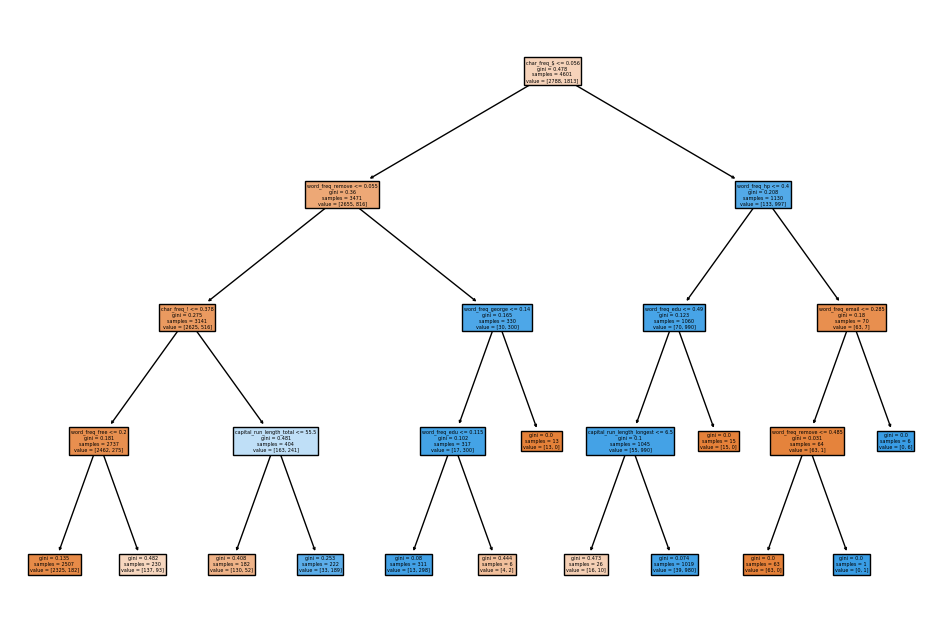

In [4]:
X = spam_data.iloc[:, :-1].values
y = spam_data.iloc[:,-1].values

#decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=4).fit(X,y)

#plot decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_clf, feature_names=col_names, filled=True)
plt.savefig('cart_model.png')
plt.show()

### b.

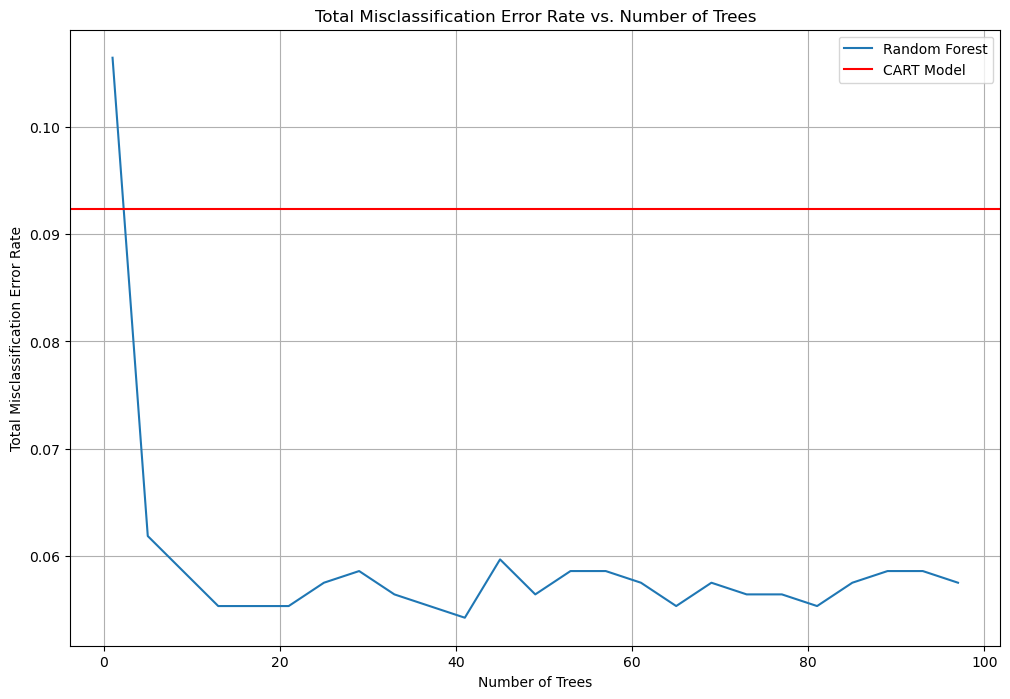

Error Rate for CART Model: 0.09229098805646041
Error Rate for Random Forest at 100 trees: 0.057546145494028256


In [5]:
#split data and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=55)

# random forest classififer 
rf_clf = RandomForestClassifier(random_state=55).fit(X_train, y_train)

# Find error rate
tree_clf_error = 1 - accuracy_score(y_test, tree_clf.predict(X_test))
rf_clf_error = 1 - accuracy_score(y_test, rf_clf.predict(X_test))

# Plot the error curve
n_trees_errors = []
for num_trees in range(1, 101, 4):
    rf_clfs = RandomForestClassifier(n_estimators=num_trees, random_state=55).fit(X_train, y_train)
    error_rate = 1 - accuracy_score(y_test, rf_clfs.predict(X_test))
    n_trees_errors.append(error_rate)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 101, 4), n_trees_errors, label="Random Forest")
plt.axhline(y=tree_clf_error, color='r', label="CART Model")
plt.xlabel("Number of Trees")
plt.ylabel("Total Misclassification Error Rate")
plt.title("Total Misclassification Error Rate vs. Number of Trees")
plt.grid(True)
plt.legend()
plt.savefig('error_curve.png')
plt.show()

print("Error Rate for CART Model:", tree_clf_error)
print("Error Rate for Random Forest at 100 trees:", rf_clf_error)

### c.

In [6]:
num_vars = range(1, X.shape[1]+1, 2)
oob_errors = []
test_errors = []

# create rf classifer for each num of variable splits
for var in num_vars:
    rf_clf = RandomForestClassifier(n_estimators=100, max_features=var, oob_score=True, random_state=55).fit(X_train, y_train)
    
    #calculate errors
    oob_error = 1 - rf_clf.oob_score_
    test_error = 1 - accuracy_score(y_test, rf_clf.predict(X_test))
    oob_errors.append(oob_error)
    test_errors.append(test_error)

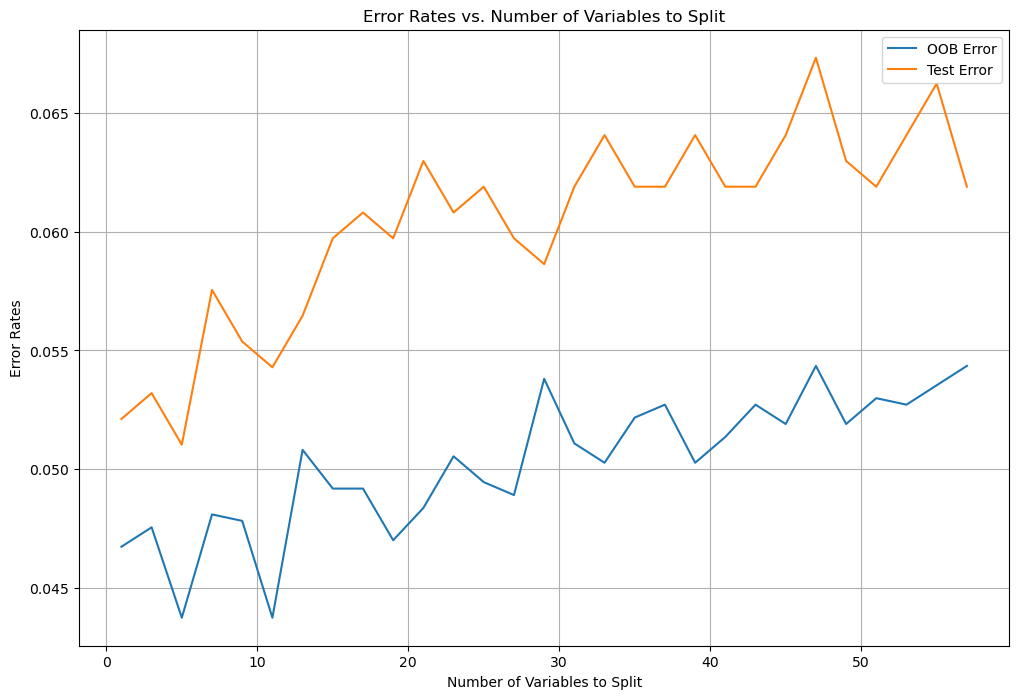

In [7]:
# error plot
plt.figure(figsize=(12, 8))
plt.plot(num_vars, oob_errors, label="OOB Error")
plt.plot(num_vars, test_errors, label="Test Error")
plt.xlabel("Number of Variables to Split")
plt.ylabel("Error Rates")
plt.title("Error Rates vs. Number of Variables to Split")
plt.legend()
plt.grid(True)
plt.savefig('OOB_error_curve.png')
plt.show()

### d.

In [8]:
# all nonspam from training block
X_nonspam = X_train[y_train == 0]

# one class svm with rbf kernel
svm_clf = OneClassSVM(kernel = 'rbf').fit(X_nonspam)
svm_pred = svm_clf.predict(X_test)

#compare with test data
svm_pred[svm_pred == 1] = 0
svm_pred[svm_pred == -1] = 1
svm_error_rate = 1 - accuracy_score(y_test, svm_pred)
print("One Class SVM using RBF Kernel error rate:", svm_error_rate)

One Class SVM using RBF Kernel error rate: 0.4755700325732899


In [9]:
# one class svm with rbf kernel and setting gamma to auto
svm_clf = OneClassSVM(kernel = 'rbf', gamma='auto').fit(X_nonspam)
svm_pred = svm_clf.predict(X_test)

#compare with test data
svm_pred[svm_pred == 1] = 0
svm_pred[svm_pred == -1] = 1
svm_error_rate = 1 - accuracy_score(y_test, svm_pred)
print("One Class SVM using RBF Kernel error rate:", svm_error_rate)

One Class SVM using RBF Kernel error rate: 0.3441910966340934
